In [1]:
from sklearn.base import BaseEstimator, ClassifierMixin

class PyTorchClassifierWrapper(BaseEstimator, ClassifierMixin):
    def __init__(self, model, device):
        self.model = model
        self.device = device

    def fit(self, X, y):
        # PyTorch models are already trained, so we don't need to do anything here
        return self

    def predict(self, X):
        self.model.eval()
        with torch.no_grad():
            X_tensor = torch.tensor(X).to(self.device)
            outputs = self.model(X_tensor).logits
            return torch.argmax(outputs, dim=1).cpu().numpy()

    def score(self, X, y):
        y_pred = self.predict(X)
        return accuracy_score(y, y_pred)
    
from sklearn.model_selection import learning_curve
import numpy as np
import matplotlib.pyplot as plt

def plot_learning_curve(estimator, title, X, y, axes=None, ylim=None, cv=None,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    if axes is None:
        _, axes = plt.subplots(1, 1, figsize=(6, 4))

    axes.set_title(title)
    if ylim is not None:
        axes.set_ylim(*ylim)
    axes.set_xlabel("Training examples")
    axes.set_ylabel("Score")

    train_sizes, train_scores, test_scores, fit_times, _ = \
        learning_curve(estimator, X, y, cv=cv, n_jobs=n_jobs,
                       train_sizes=train_sizes,
                       return_times=True)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    # Plot learning curve
    axes.grid()
    axes.fill_between(train_sizes, train_scores_mean - train_scores_std,
                      train_scores_mean + train_scores_std, alpha=0.1,
                      color="r")
    axes.fill_between(train_sizes, test_scores_mean - test_scores_std,
                      test_scores_mean + test_scores_std, alpha=0.1,
                      color="g")
    axes.plot(train_sizes, train_scores_mean, 'o-', color="r",
              label="Training score")
    axes.plot(train_sizes, test_scores_mean, 'o-', color="g",
              label="Cross-validation score")
    axes.legend(loc="best")

    return axes

In [2]:
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
import matplotlib.pyplot as plt
import numpy as np

def plot_roc_curve(y_true, y_pred_proba, label_encoder, model_name):
    n_classes = len(label_encoder.classes_)
    
    # Compute ROC curve and ROC area for each class
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    y_true_bin = label_binarize(y_true, classes=range(n_classes))
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true_bin[:, i], y_pred_proba[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Plot ROC curves
    plt.figure(figsize=(6, 4))
    colors = plt.cm.get_cmap('Set1')(np.linspace(0, 1, n_classes))
    
    for i, color in zip(range(n_classes), colors):
        class_name = label_encoder.classes_[i]
        plt.plot(fpr[i], tpr[i], color=color, lw=2,
                 label=f'ROC curve of {class_name} (area = {roc_auc[i]:0.2f})')

    plt.plot([0, 1], [0, 1], 'k--', lw=2)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=10)
    plt.ylabel('True Positive Rate', fontsize=10)
    plt.title(f'ROC Curve - {model_name}', fontsize=10)
    plt.legend(loc="lower right", fontsize=8)
    plt.grid(True, linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

/usr/local/lib/python3.8/dist-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Training and evaluating model: distilbert-base-uncased


Some weights of the model checkpoint at distilbert-base-uncased were not used when initializing DistilBertForSequenceClassification: ['vocab_transform.weight', 'vocab_projector.weight', 'vocab_projector.bias', 'vocab_layer_norm.weight', 'vocab_layer_norm.bias', 'vocab_transform.bias']
- This IS expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing DistilBertForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['pre_classifier.weight', 'pre_classifier.bias', 'classi

Epoch 1, Average Loss: 1.5293, Average Accuracy: 0.4922
Epoch 2, Average Loss: 1.2543, Average Accuracy: 0.5758
Epoch 3, Average Loss: 1.1295, Average Accuracy: 0.6069
Epoch 4, Average Loss: 1.0084, Average Accuracy: 0.6549
Epoch 5, Average Loss: 0.9155, Average Accuracy: 0.6870
Epoch 6, Average Loss: 0.8081, Average Accuracy: 0.7257
Epoch 7, Average Loss: 0.7276, Average Accuracy: 0.7452
Epoch 8, Average Loss: 0.6593, Average Accuracy: 0.7634
Epoch 9, Average Loss: 0.5952, Average Accuracy: 0.7825
Epoch 10, Average Loss: 0.5388, Average Accuracy: 0.7983


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Testing - Accuracy: 0.6270022883295194
Testing - Precision: 0.6183536474434617
Testing - Recall 0.6270022883295194
Testing - F1 Score 0.6206802038023495


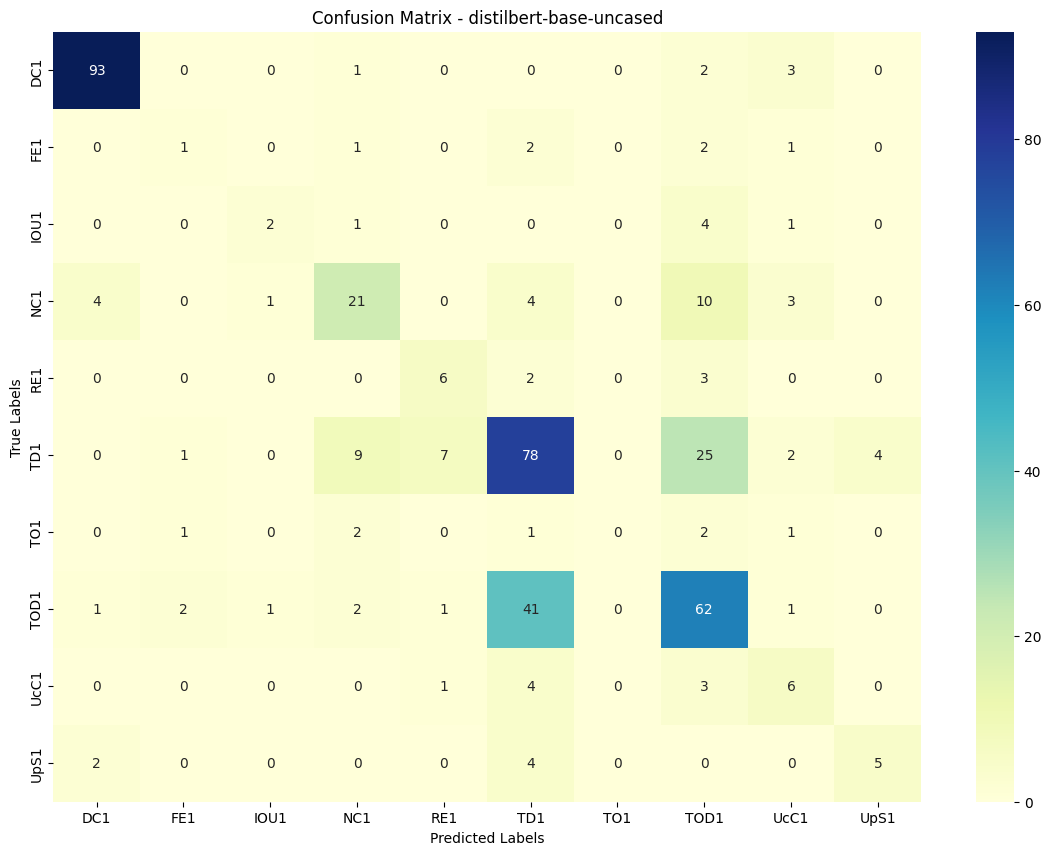

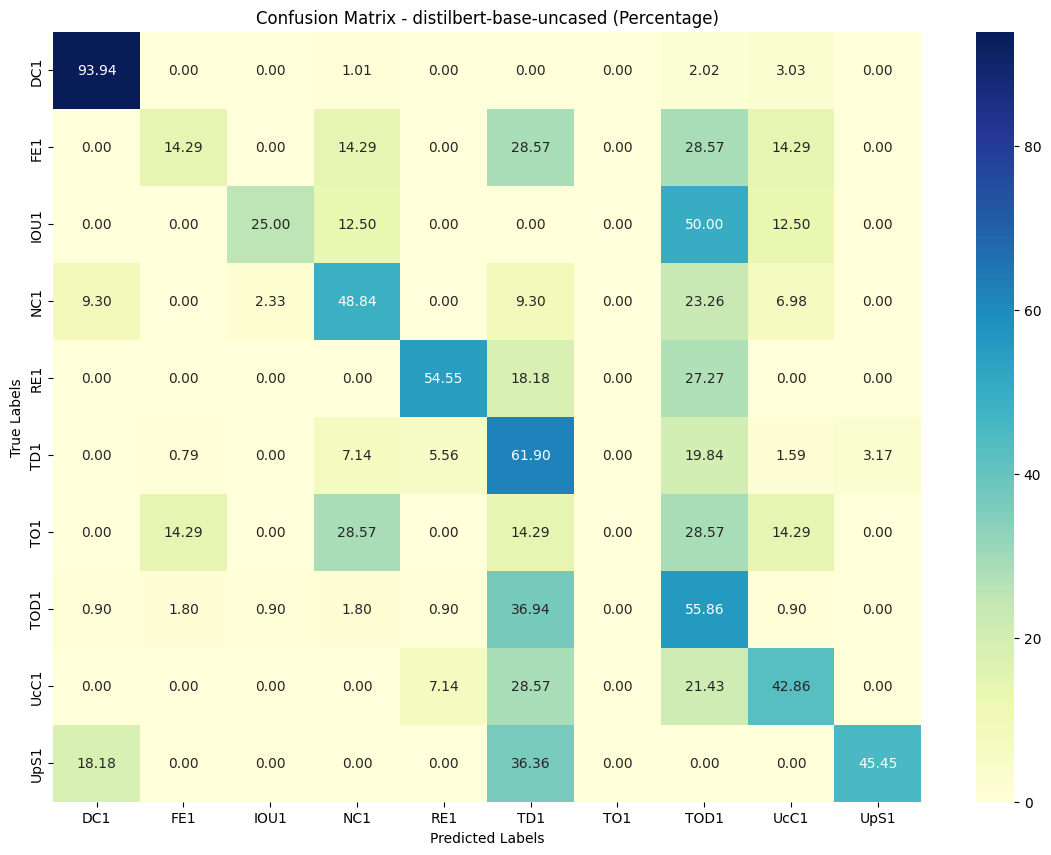

Class DC1 - Precision: 0.9300, Recall: 0.9394, F1 Score: 0.9347, Accuracy: 0.9394
Class FE1 - Precision: 0.2000, Recall: 0.1429, F1 Score: 0.1667, Accuracy: 0.1429
Class IOU1 - Precision: 0.5000, Recall: 0.2500, F1 Score: 0.3333, Accuracy: 0.2500
Class NC1 - Precision: 0.5676, Recall: 0.4884, F1 Score: 0.5250, Accuracy: 0.4884
Class RE1 - Precision: 0.4000, Recall: 0.5455, F1 Score: 0.4615, Accuracy: 0.5455
Class TD1 - Precision: 0.5735, Recall: 0.6190, F1 Score: 0.5954, Accuracy: 0.6190
Class TO1 - Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000, Accuracy: 0.0000
Class TOD1 - Precision: 0.5487, Recall: 0.5586, F1 Score: 0.5536, Accuracy: 0.5586
Class UcC1 - Precision: 0.3333, Recall: 0.4286, F1 Score: 0.3750, Accuracy: 0.4286
Class UpS1 - Precision: 0.5556, Recall: 0.4545, F1 Score: 0.5000, Accuracy: 0.4545


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/tmp/ipykernel_696646/3784454423.py", line 20, in score
    y_pred = self.predict(X)
  File "/tmp/ipykernel_696646/3784454423.py", line 16, in predict
    ou

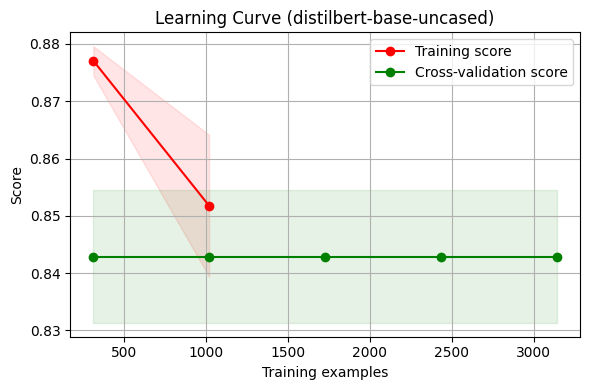

/tmp/ipykernel_696646/3999779995.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1')(np.linspace(0, 1, n_classes))


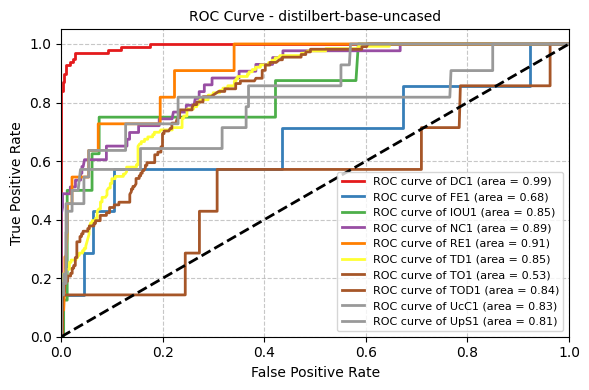


Training and evaluating model: huggingface/prunebert-base-uncased-6-finepruned-w-distil-mnli


Some weights of BertForSequenceClassification were not initialized from the model checkpoint at huggingface/prunebert-base-uncased-6-finepruned-w-distil-mnli and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([3, 768]) in the checkpoint and torch.Size([10, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([3]) in the checkpoint and torch.Size([10]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Average Loss: 1.6428, Average Accuracy: 0.4434
Epoch 2, Average Loss: 1.3858, Average Accuracy: 0.5417
Epoch 3, Average Loss: 1.2686, Average Accuracy: 0.5728
Epoch 4, Average Loss: 1.1779, Average Accuracy: 0.6063
Epoch 5, Average Loss: 1.0981, Average Accuracy: 0.6331
Epoch 6, Average Loss: 1.0196, Average Accuracy: 0.6539
Epoch 7, Average Loss: 0.9388, Average Accuracy: 0.6828
Epoch 8, Average Loss: 0.8723, Average Accuracy: 0.7062
Epoch 9, Average Loss: 0.8103, Average Accuracy: 0.7196
Epoch 10, Average Loss: 0.7606, Average Accuracy: 0.7352


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Testing - Accuracy: 0.6224256292906178
Testing - Precision: 0.6129748549279559
Testing - Recall 0.6224256292906178
Testing - F1 Score 0.6089178636727746


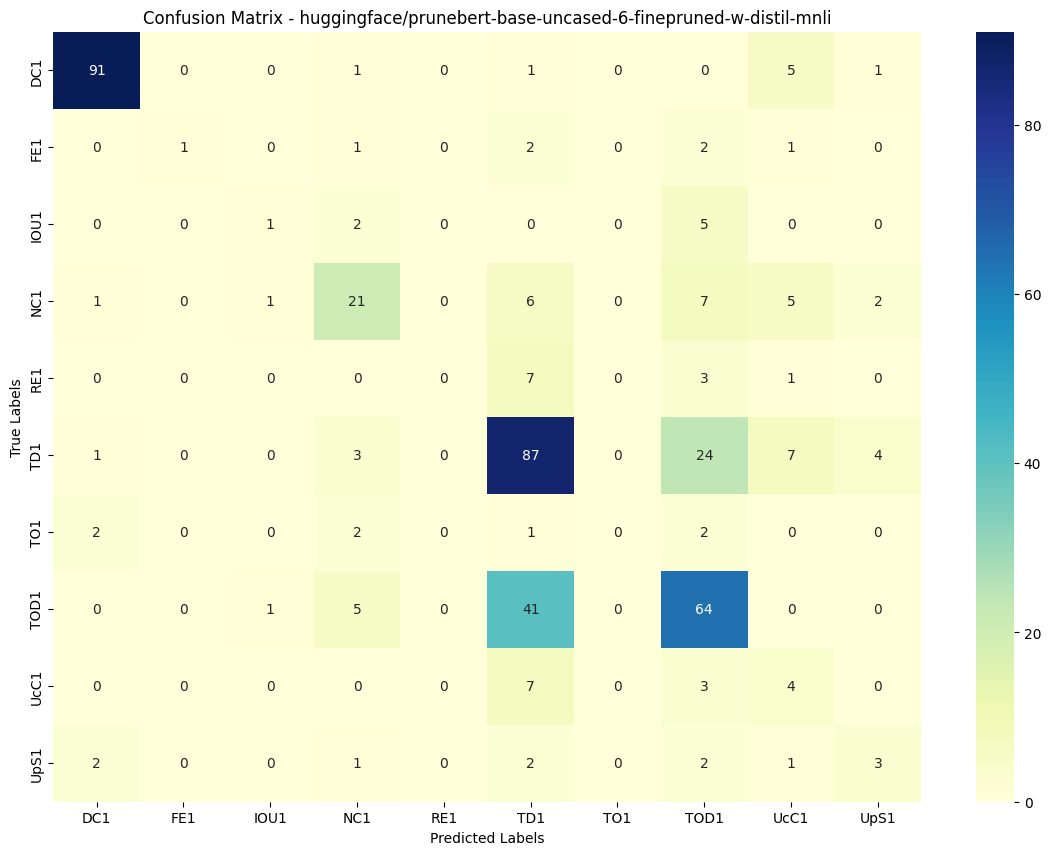

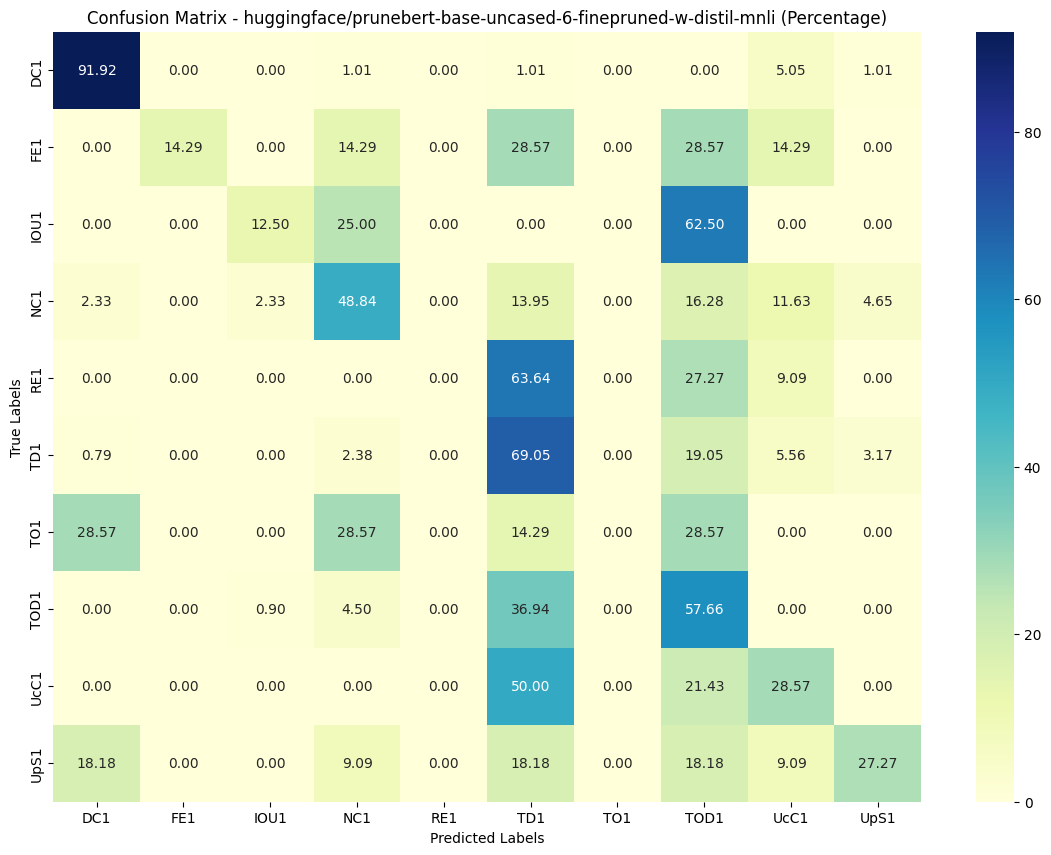

Class DC1 - Precision: 0.9381, Recall: 0.9192, F1 Score: 0.9286, Accuracy: 0.9192
Class FE1 - Precision: 1.0000, Recall: 0.1429, F1 Score: 0.2500, Accuracy: 0.1429
Class IOU1 - Precision: 0.3333, Recall: 0.1250, F1 Score: 0.1818, Accuracy: 0.1250
Class NC1 - Precision: 0.5833, Recall: 0.4884, F1 Score: 0.5316, Accuracy: 0.4884
Class RE1 - Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000, Accuracy: 0.0000
Class TD1 - Precision: 0.5649, Recall: 0.6905, F1 Score: 0.6214, Accuracy: 0.6905
Class TO1 - Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000, Accuracy: 0.0000
Class TOD1 - Precision: 0.5714, Recall: 0.5766, F1 Score: 0.5740, Accuracy: 0.5766
Class UcC1 - Precision: 0.1667, Recall: 0.2857, F1 Score: 0.2105, Accuracy: 0.2857
Class UpS1 - Precision: 0.3000, Recall: 0.2727, F1 Score: 0.2857, Accuracy: 0.2727


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/pytho

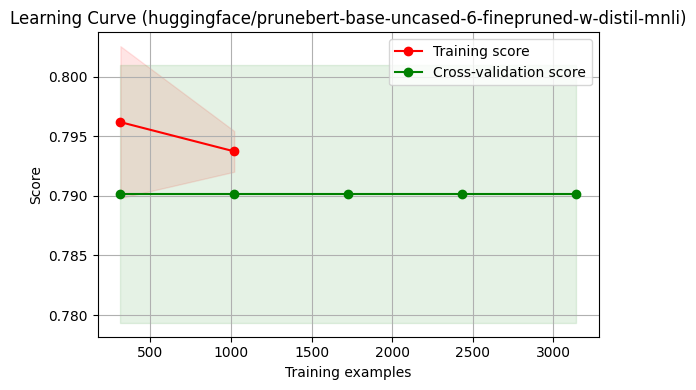

/tmp/ipykernel_696646/3999779995.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1')(np.linspace(0, 1, n_classes))


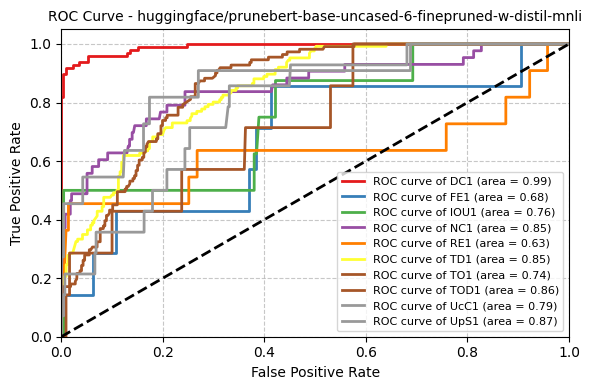


Training and evaluating model: distilbert-base-uncased-finetuned-sst-2-english


Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased-finetuned-sst-2-english and are newly initialized because the shapes did not match:
- classifier.weight: found shape torch.Size([2, 768]) in the checkpoint and torch.Size([10, 768]) in the model instantiated
- classifier.bias: found shape torch.Size([2]) in the checkpoint and torch.Size([10]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Average Loss: 1.5413, Average Accuracy: 0.4818
Epoch 2, Average Loss: 1.2552, Average Accuracy: 0.5811
Epoch 3, Average Loss: 1.1200, Average Accuracy: 0.6218
Epoch 4, Average Loss: 1.0058, Average Accuracy: 0.6549
Epoch 5, Average Loss: 0.8958, Average Accuracy: 0.6896
Epoch 6, Average Loss: 0.8162, Average Accuracy: 0.7156
Epoch 7, Average Loss: 0.7329, Average Accuracy: 0.7433
Epoch 8, Average Loss: 0.6582, Average Accuracy: 0.7619
Epoch 9, Average Loss: 0.6028, Average Accuracy: 0.7812
Epoch 10, Average Loss: 0.5638, Average Accuracy: 0.7884


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Testing - Accuracy: 0.620137299771167
Testing - Precision: 0.6335585643455003
Testing - Recall 0.620137299771167
Testing - F1 Score 0.6090264008655494


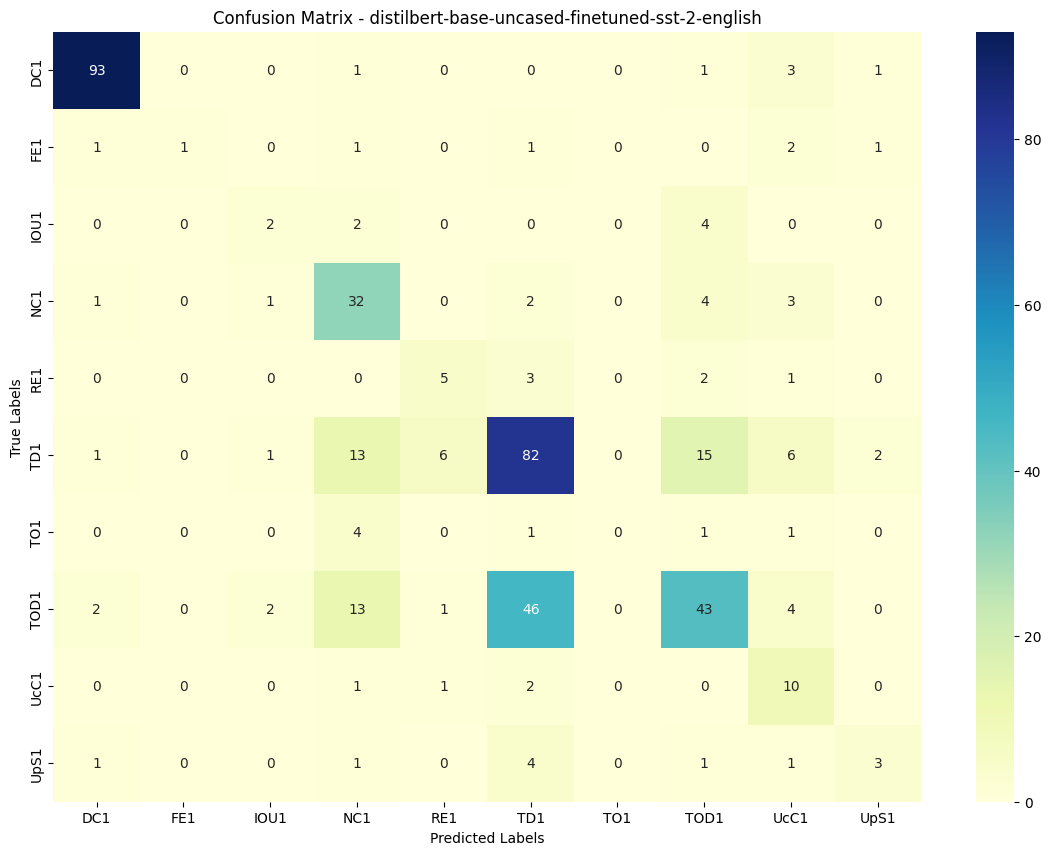

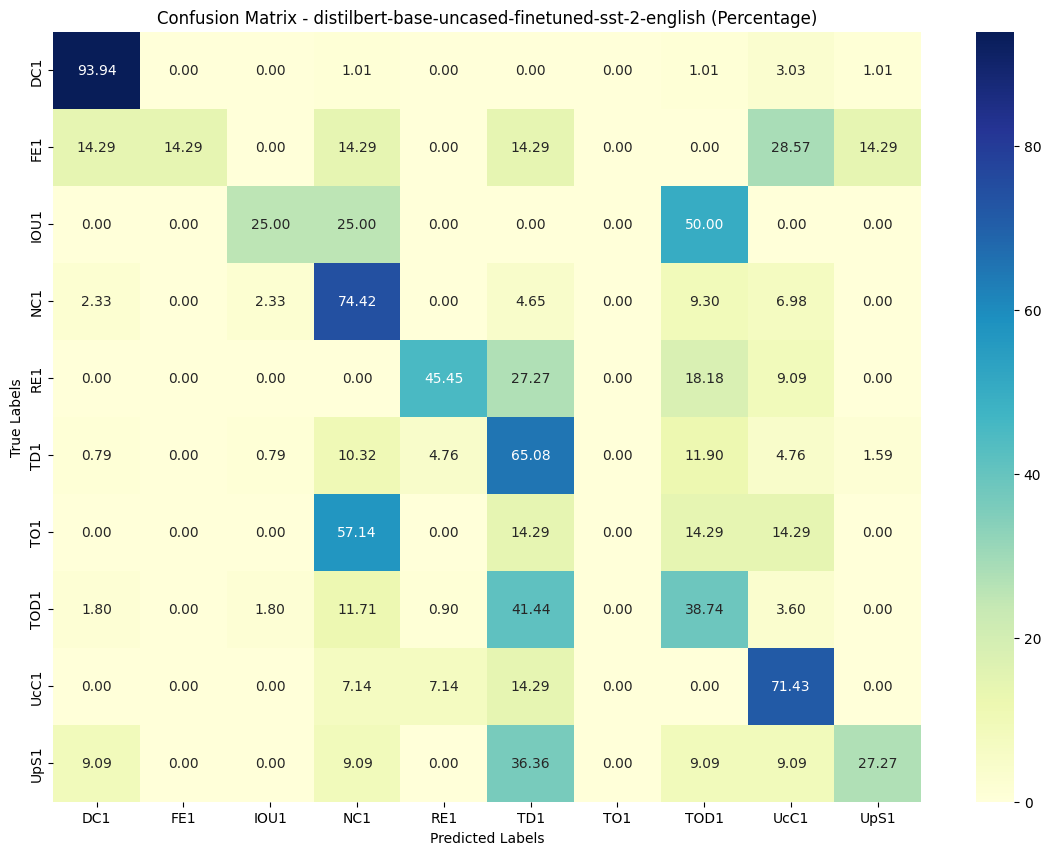

Class DC1 - Precision: 0.9394, Recall: 0.9394, F1 Score: 0.9394, Accuracy: 0.9394
Class FE1 - Precision: 1.0000, Recall: 0.1429, F1 Score: 0.2500, Accuracy: 0.1429
Class IOU1 - Precision: 0.3333, Recall: 0.2500, F1 Score: 0.2857, Accuracy: 0.2500
Class NC1 - Precision: 0.4706, Recall: 0.7442, F1 Score: 0.5766, Accuracy: 0.7442
Class RE1 - Precision: 0.3846, Recall: 0.4545, F1 Score: 0.4167, Accuracy: 0.4545
Class TD1 - Precision: 0.5816, Recall: 0.6508, F1 Score: 0.6142, Accuracy: 0.6508
Class TO1 - Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000, Accuracy: 0.0000
Class TOD1 - Precision: 0.6056, Recall: 0.3874, F1 Score: 0.4725, Accuracy: 0.3874
Class UcC1 - Precision: 0.3226, Recall: 0.7143, F1 Score: 0.4444, Accuracy: 0.7143
Class UpS1 - Precision: 0.4286, Recall: 0.2727, F1 Score: 0.3333, Accuracy: 0.2727


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/tmp/ipykernel_696646/3784454423.py", line 20, in score
    y_pred = self.predict(X)
  File "/tmp/ipykernel_696646/3784454423.py", line 16, in predict
    ou

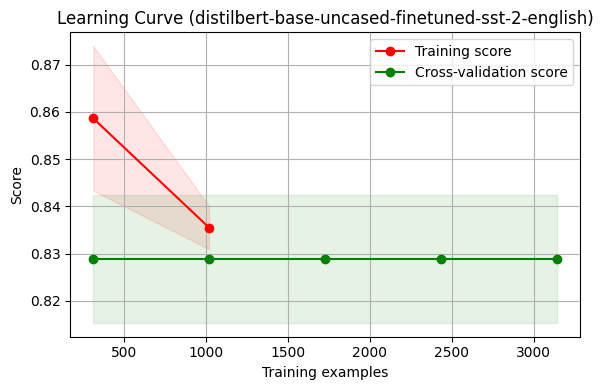

/tmp/ipykernel_696646/3999779995.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1')(np.linspace(0, 1, n_classes))


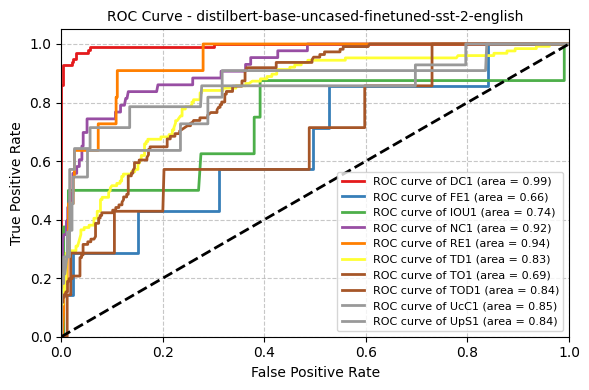


Training and evaluating model: intfloat/simlm-msmarco-reranker


Some weights of ElectraForSequenceClassification were not initialized from the model checkpoint at intfloat/simlm-msmarco-reranker and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([1, 768]) in the checkpoint and torch.Size([10, 768]) in the model instantiated
- classifier.out_proj.bias: found shape torch.Size([1]) in the checkpoint and torch.Size([10]) in the model instantiated
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


Epoch 1, Average Loss: 1.5962, Average Accuracy: 0.4673
Epoch 2, Average Loss: 1.3168, Average Accuracy: 0.5615
Epoch 3, Average Loss: 1.2028, Average Accuracy: 0.5982
Epoch 4, Average Loss: 1.1094, Average Accuracy: 0.6244
Epoch 5, Average Loss: 1.0072, Average Accuracy: 0.6550
Epoch 6, Average Loss: 0.9407, Average Accuracy: 0.6697
Epoch 7, Average Loss: 0.8698, Average Accuracy: 0.7023
Epoch 8, Average Loss: 0.8093, Average Accuracy: 0.7117
Epoch 9, Average Loss: 0.7428, Average Accuracy: 0.7422
Epoch 10, Average Loss: 0.6888, Average Accuracy: 0.7548
Testing - Accuracy: 0.5697940503432495
Testing - Precision: 0.5808774305922345
Testing - Recall 0.5697940503432495
Testing - F1 Score 0.5705722605098896


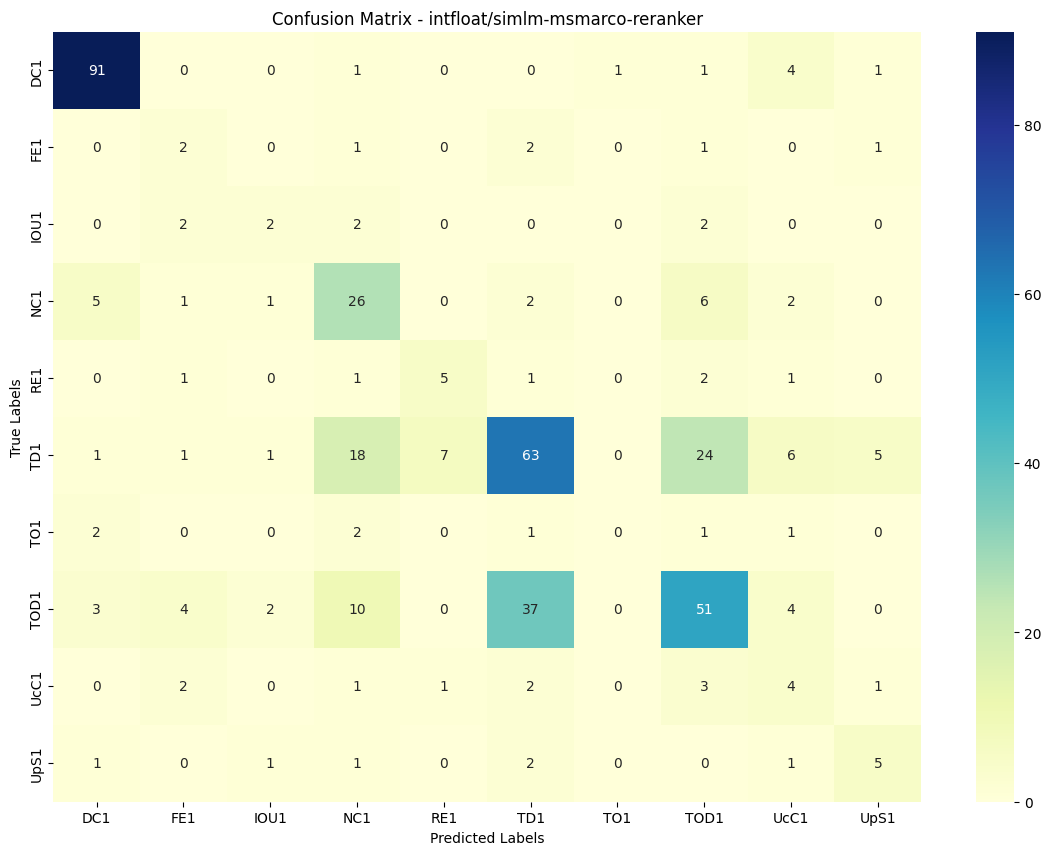

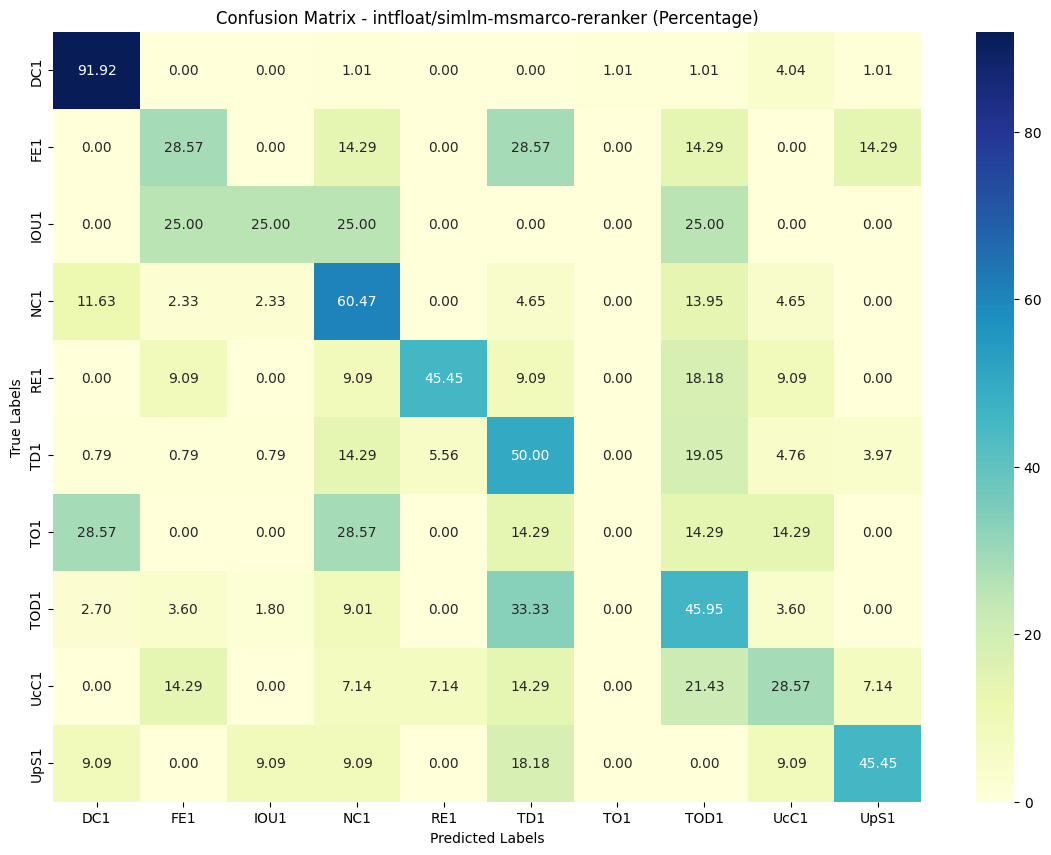

Class DC1 - Precision: 0.8835, Recall: 0.9192, F1 Score: 0.9010, Accuracy: 0.9192
Class FE1 - Precision: 0.1538, Recall: 0.2857, F1 Score: 0.2000, Accuracy: 0.2857
Class IOU1 - Precision: 0.2857, Recall: 0.2500, F1 Score: 0.2667, Accuracy: 0.2500
Class NC1 - Precision: 0.4127, Recall: 0.6047, F1 Score: 0.4906, Accuracy: 0.6047
Class RE1 - Precision: 0.3846, Recall: 0.4545, F1 Score: 0.4167, Accuracy: 0.4545
Class TD1 - Precision: 0.5727, Recall: 0.5000, F1 Score: 0.5339, Accuracy: 0.5000
Class TO1 - Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000, Accuracy: 0.0000
Class TOD1 - Precision: 0.5604, Recall: 0.4595, F1 Score: 0.5050, Accuracy: 0.4595
Class UcC1 - Precision: 0.1739, Recall: 0.2857, F1 Score: 0.2162, Accuracy: 0.2857
Class UpS1 - Precision: 0.3846, Recall: 0.4545, F1 Score: 0.4167, Accuracy: 0.4545


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/tmp/ipykernel_696646/3784454423.py", line 20, in score
    y_pred = self.predict(X)
  File "/tmp/ipykernel_696646/3784454423.py", line 16, in predict
    outputs = self.model(X_tensor).logits
  File "/home/islab-ai/.local/lib/python3.8/site-packages/torch/nn/modules/module.py", line 1110, in _call_impl
    return forward_call(*input, **kwargs)
  File "/home/islab-ai/.local/lib/python3.8/site-packages/transformers/models/electra/modeling_elect

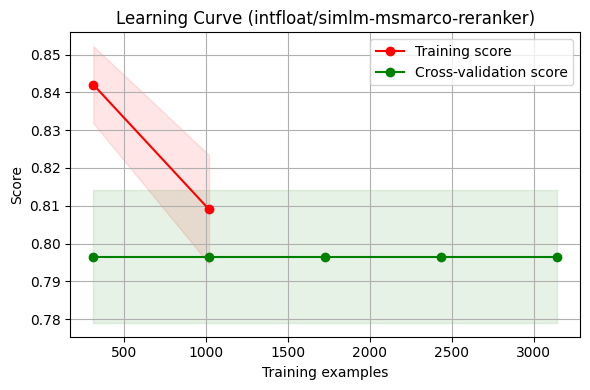

/tmp/ipykernel_696646/3999779995.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1')(np.linspace(0, 1, n_classes))


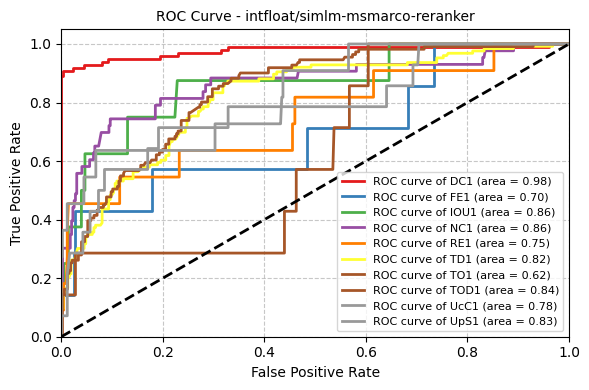


Training and evaluating model: FacebookAI/roberta-large-mnli


Some weights of the model checkpoint at FacebookAI/roberta-large-mnli were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/roberta-large-mnli and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([3, 1024]) in the checkpoint and torch.Size([10, 1024]) in the

Epoch 1, Average Loss: 1.6209, Average Accuracy: 0.4220
Epoch 2, Average Loss: 1.3762, Average Accuracy: 0.5169
Epoch 3, Average Loss: 1.2410, Average Accuracy: 0.5650
Epoch 4, Average Loss: 1.1451, Average Accuracy: 0.5972
Epoch 5, Average Loss: 1.0570, Average Accuracy: 0.6326
Epoch 6, Average Loss: 0.9943, Average Accuracy: 0.6419
Epoch 7, Average Loss: 0.8867, Average Accuracy: 0.6848
Epoch 8, Average Loss: 0.7983, Average Accuracy: 0.7122
Epoch 9, Average Loss: 0.7364, Average Accuracy: 0.7325
Epoch 10, Average Loss: 0.6798, Average Accuracy: 0.7445
Testing - Accuracy: 0.6224256292906178
Testing - Precision: 0.64027482946218
Testing - Recall 0.6224256292906178
Testing - F1 Score 0.6209662023955674


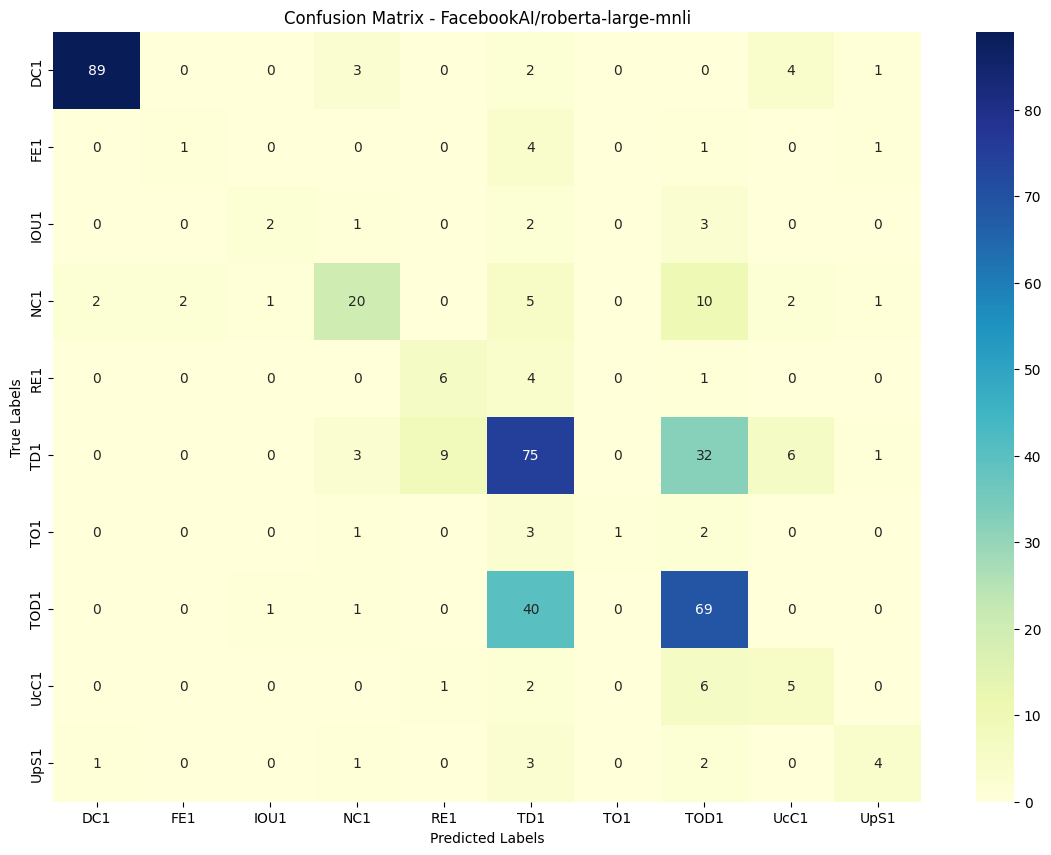

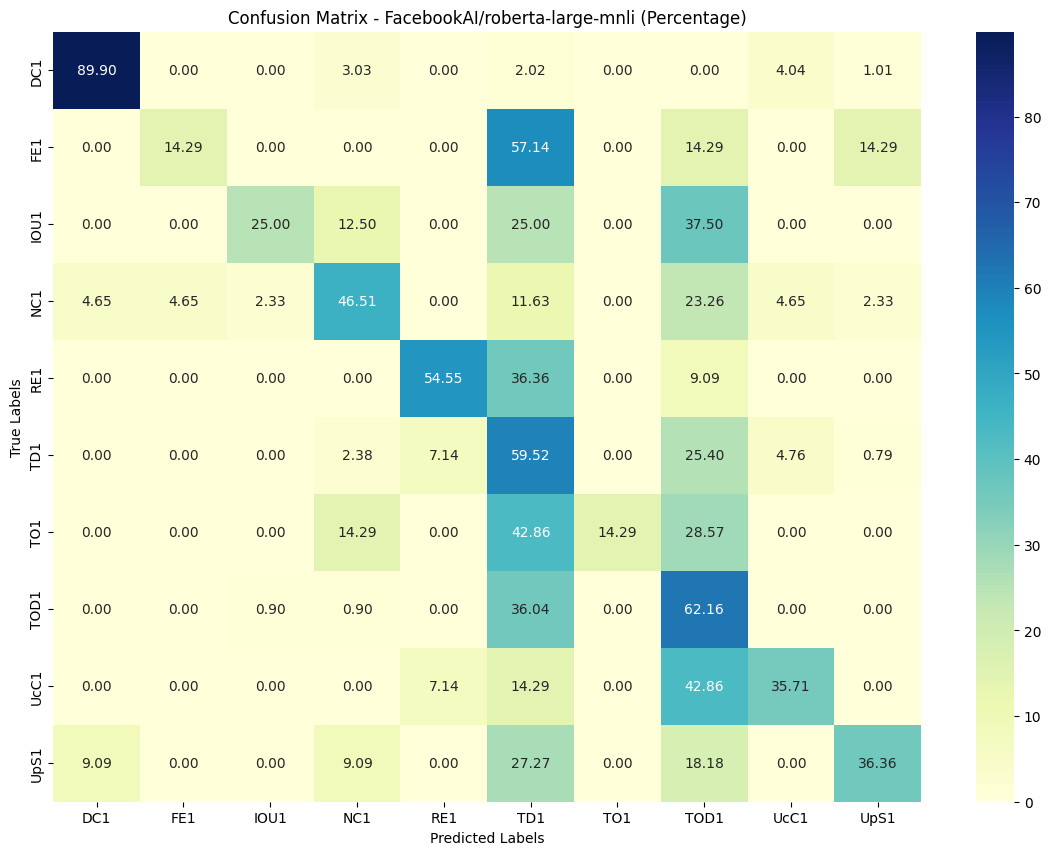

Class DC1 - Precision: 0.9674, Recall: 0.8990, F1 Score: 0.9319, Accuracy: 0.8990
Class FE1 - Precision: 0.3333, Recall: 0.1429, F1 Score: 0.2000, Accuracy: 0.1429
Class IOU1 - Precision: 0.5000, Recall: 0.2500, F1 Score: 0.3333, Accuracy: 0.2500
Class NC1 - Precision: 0.6667, Recall: 0.4651, F1 Score: 0.5479, Accuracy: 0.4651
Class RE1 - Precision: 0.3750, Recall: 0.5455, F1 Score: 0.4444, Accuracy: 0.5455
Class TD1 - Precision: 0.5357, Recall: 0.5952, F1 Score: 0.5639, Accuracy: 0.5952
Class TO1 - Precision: 1.0000, Recall: 0.1429, F1 Score: 0.2500, Accuracy: 0.1429
Class TOD1 - Precision: 0.5476, Recall: 0.6216, F1 Score: 0.5823, Accuracy: 0.6216
Class UcC1 - Precision: 0.2941, Recall: 0.3571, F1 Score: 0.3226, Accuracy: 0.3571
Class UpS1 - Precision: 0.5000, Recall: 0.3636, F1 Score: 0.4211, Accuracy: 0.3636


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/tmp/ipykernel_696646/3784454423.py", line 20, in score
    y_pred = self.predict(X)
  File "/tmp/ipykernel_696646/3784454423.py", line 16, in predict
    outputs = self.model(X_tensor).logits
  File "/home/islab-ai/.local/lib/python3.8/site-packages/torch/nn/modules/module.py", line 1110, in _call_impl
    return forward_call(*input, **kwargs)
  File "/home/islab-ai/.local/lib/python3.8/site-packages/transformers/models/roberta/modeling_rober

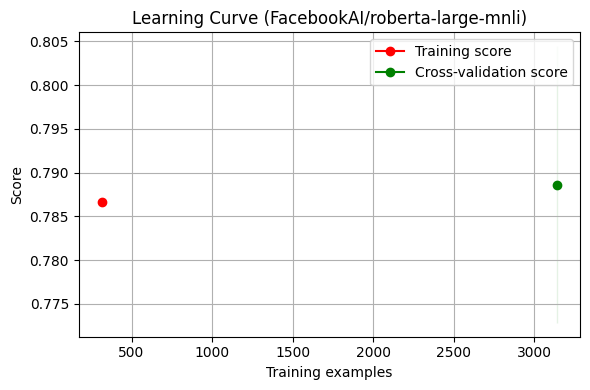

/tmp/ipykernel_696646/3999779995.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1')(np.linspace(0, 1, n_classes))


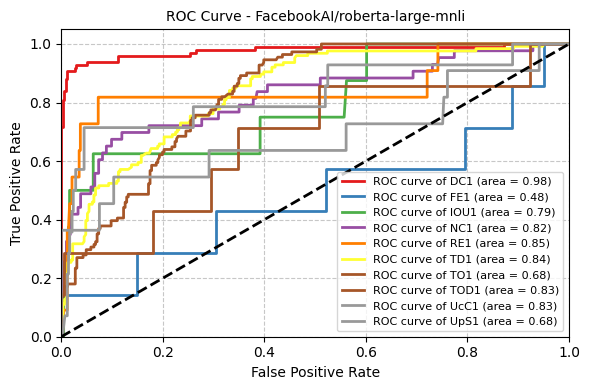


Training and evaluating model: FacebookAI/xlm-roberta-large-finetuned-conll03-english


Some weights of the model checkpoint at FacebookAI/xlm-roberta-large-finetuned-conll03-english were not used when initializing XLMRobertaForSequenceClassification: ['classifier.weight', 'roberta.pooler.dense.weight', 'roberta.pooler.dense.bias', 'classifier.bias']
- This IS expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing XLMRobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of XLMRobertaForSequenceClassification were not initialized from the model checkpoint at FacebookAI/xlm-roberta-large-finetuned-conll03-english and are newly initialized: ['classifier.dense.bias', 'classifier.dense.we

Epoch 1, Average Loss: 1.4892, Average Accuracy: 0.4853
Epoch 2, Average Loss: 1.2599, Average Accuracy: 0.5663
Epoch 3, Average Loss: 1.1380, Average Accuracy: 0.6011
Epoch 4, Average Loss: 1.0562, Average Accuracy: 0.6310
Epoch 5, Average Loss: 0.9598, Average Accuracy: 0.6667
Epoch 6, Average Loss: 0.8855, Average Accuracy: 0.6809
Epoch 7, Average Loss: 0.8214, Average Accuracy: 0.7049
Epoch 8, Average Loss: 0.7481, Average Accuracy: 0.7272
Epoch 9, Average Loss: 0.6911, Average Accuracy: 0.7472
Epoch 10, Average Loss: 0.6926, Average Accuracy: 0.7435
Testing - Accuracy: 0.6292906178489702
Testing - Precision: 0.653582375531405
Testing - Recall 0.6292906178489702
Testing - F1 Score 0.6213716533468738


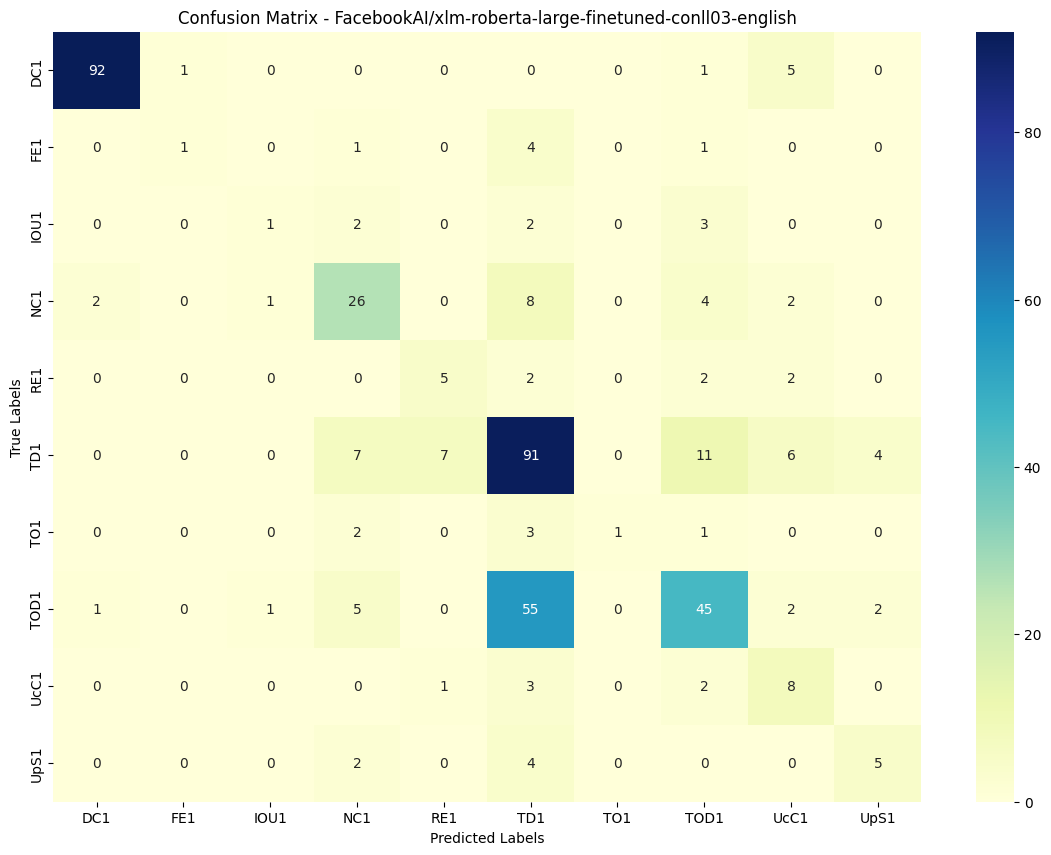

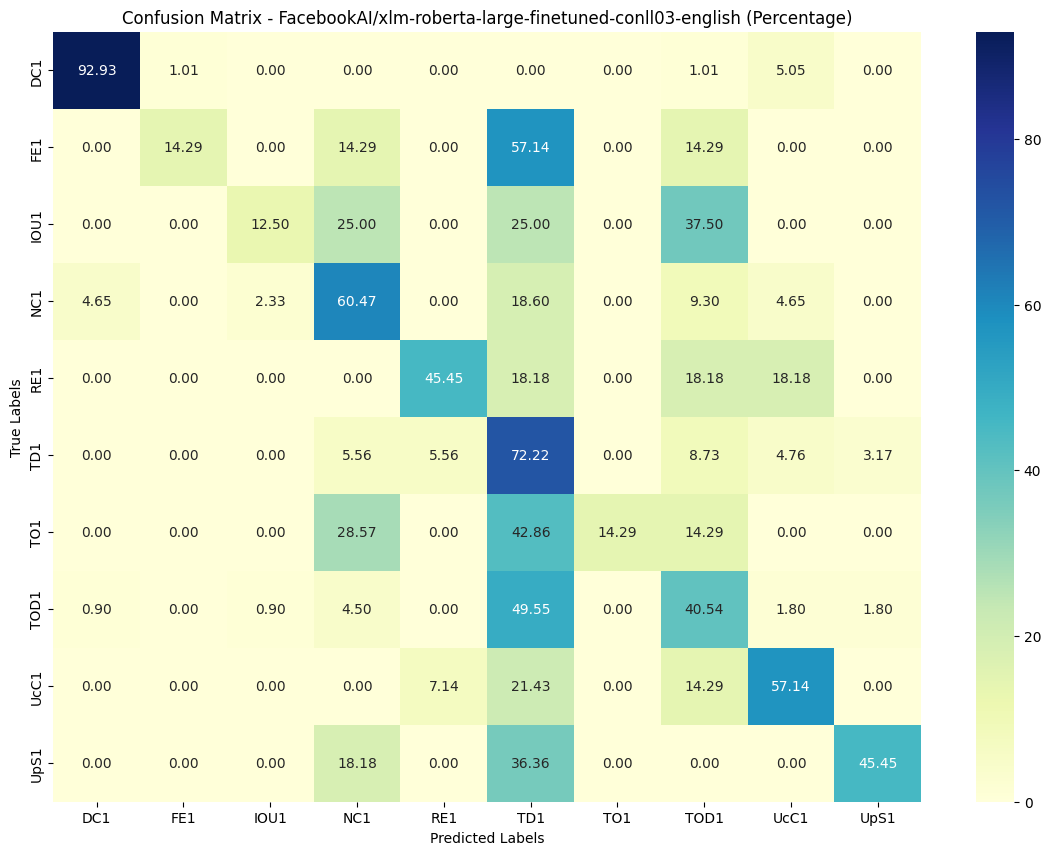

Class DC1 - Precision: 0.9684, Recall: 0.9293, F1 Score: 0.9485, Accuracy: 0.9293
Class FE1 - Precision: 0.5000, Recall: 0.1429, F1 Score: 0.2222, Accuracy: 0.1429
Class IOU1 - Precision: 0.3333, Recall: 0.1250, F1 Score: 0.1818, Accuracy: 0.1250
Class NC1 - Precision: 0.5778, Recall: 0.6047, F1 Score: 0.5909, Accuracy: 0.6047
Class RE1 - Precision: 0.3846, Recall: 0.4545, F1 Score: 0.4167, Accuracy: 0.4545
Class TD1 - Precision: 0.5291, Recall: 0.7222, F1 Score: 0.6107, Accuracy: 0.7222
Class TO1 - Precision: 1.0000, Recall: 0.1429, F1 Score: 0.2500, Accuracy: 0.1429
Class TOD1 - Precision: 0.6429, Recall: 0.4054, F1 Score: 0.4972, Accuracy: 0.4054
Class UcC1 - Precision: 0.3200, Recall: 0.5714, F1 Score: 0.4103, Accuracy: 0.5714
Class UpS1 - Precision: 0.4545, Recall: 0.4545, F1 Score: 0.4545, Accuracy: 0.4545


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/tmp/ipykernel_696646/3784454423.py", line 20, in score
    y_pred = self.predict(X)
  File "/tmp/ipykernel_696646/3784454423.py", line 16, in predict
    outputs = self.model(X_tensor).logits
  File "/home/islab-ai/.local/lib/python3.8/site-packages/torch/nn/modules/module.py", line 1110, in _call_impl
    return forward_call(*input, **kwargs)
  File "/home/islab-ai/.local/lib/python3.8/site-packages/transformers/models/roberta/modeling_rober

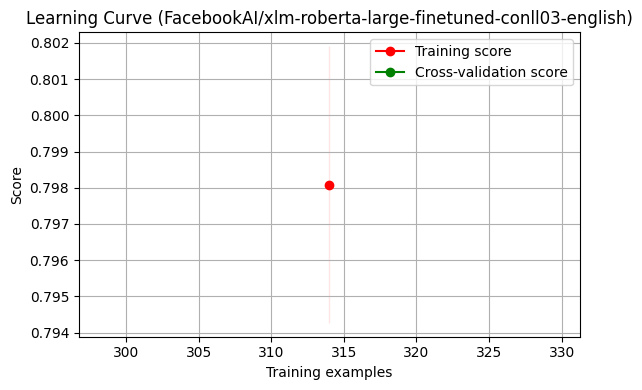

/tmp/ipykernel_696646/3999779995.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1')(np.linspace(0, 1, n_classes))


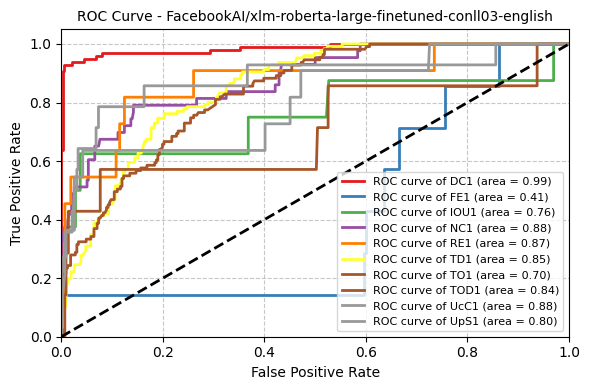


Training and evaluating model: openai-community/roberta-large-openai-detector


Some weights of the model checkpoint at openai-community/roberta-large-openai-detector were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at openai-community/roberta-large-openai-detector and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([2, 1024]) in the checkpoint

Epoch 1, Average Loss: 1.4978, Average Accuracy: 0.4852
Epoch 2, Average Loss: 1.2282, Average Accuracy: 0.5836
Epoch 3, Average Loss: 1.0993, Average Accuracy: 0.6127
Epoch 4, Average Loss: 0.9897, Average Accuracy: 0.6455
Epoch 5, Average Loss: 0.8937, Average Accuracy: 0.6832
Epoch 6, Average Loss: 0.8107, Average Accuracy: 0.7011
Epoch 7, Average Loss: 0.7346, Average Accuracy: 0.7352
Epoch 8, Average Loss: 0.6882, Average Accuracy: 0.7453
Epoch 9, Average Loss: 0.6380, Average Accuracy: 0.7555
Epoch 10, Average Loss: 0.5944, Average Accuracy: 0.7761
Testing - Accuracy: 0.5949656750572082
Testing - Precision: 0.6123218511425946
Testing - Recall 0.5949656750572082
Testing - F1 Score 0.5948634373382063


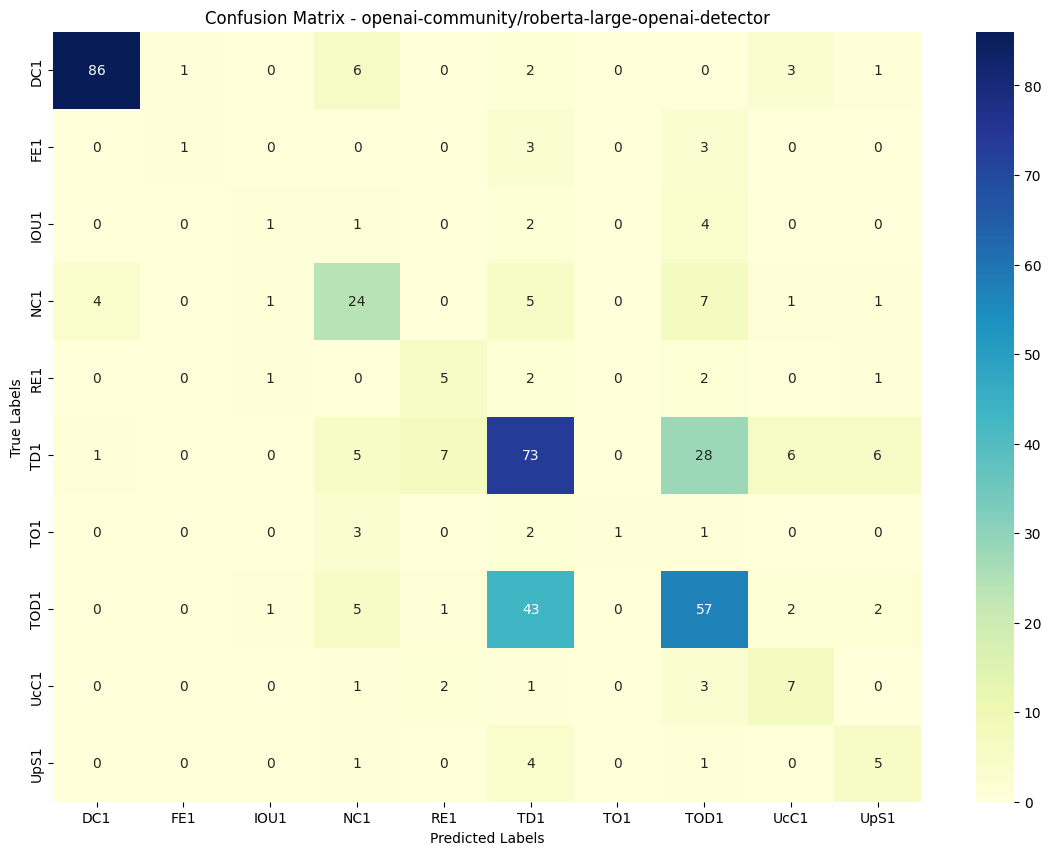

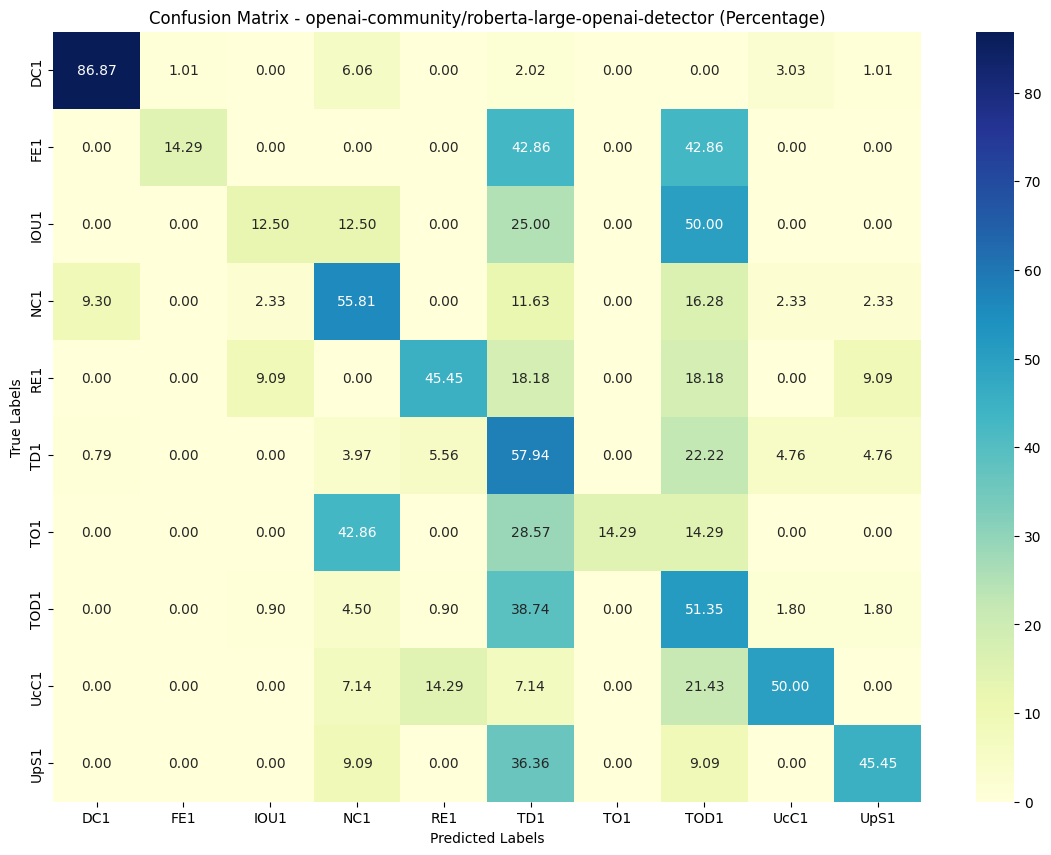

Class DC1 - Precision: 0.9451, Recall: 0.8687, F1 Score: 0.9053, Accuracy: 0.8687
Class FE1 - Precision: 0.5000, Recall: 0.1429, F1 Score: 0.2222, Accuracy: 0.1429
Class IOU1 - Precision: 0.2500, Recall: 0.1250, F1 Score: 0.1667, Accuracy: 0.1250
Class NC1 - Precision: 0.5217, Recall: 0.5581, F1 Score: 0.5393, Accuracy: 0.5581
Class RE1 - Precision: 0.3333, Recall: 0.4545, F1 Score: 0.3846, Accuracy: 0.4545
Class TD1 - Precision: 0.5328, Recall: 0.5794, F1 Score: 0.5551, Accuracy: 0.5794
Class TO1 - Precision: 1.0000, Recall: 0.1429, F1 Score: 0.2500, Accuracy: 0.1429
Class TOD1 - Precision: 0.5377, Recall: 0.5135, F1 Score: 0.5253, Accuracy: 0.5135
Class UcC1 - Precision: 0.3684, Recall: 0.5000, F1 Score: 0.4242, Accuracy: 0.5000
Class UpS1 - Precision: 0.3125, Recall: 0.4545, F1 Score: 0.3704, Accuracy: 0.4545


/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/tmp/ipykernel_696646/3784454423.py", line 20, in score
    y_pred = self.predict(X)
  File "/tmp/ipykernel_696646/3784454423.py", line 16, in predict
    outputs = self.model(X_tensor).logits
  File "/home/islab-ai/.local/lib/python3.8/site-packages/torch/nn/modules/module.py", line 1110, in _call_impl
    return forward_call(*input, **kwargs)
  File "/home/islab-ai/.local/lib/python3.8/site-packages/transformers/models/roberta/modeling_rober

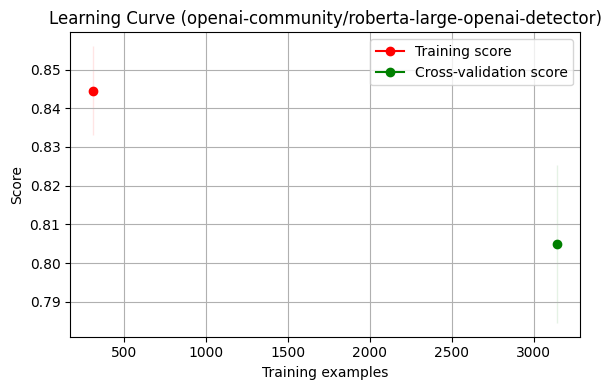

/tmp/ipykernel_696646/3999779995.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1')(np.linspace(0, 1, n_classes))


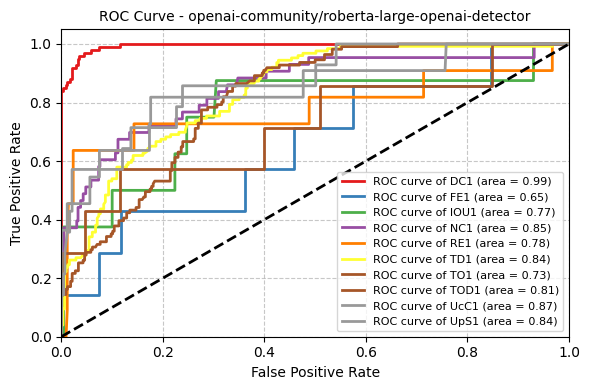


Training and evaluating model: openai-community/roberta-base-openai-detector


Some weights of the model checkpoint at openai-community/roberta-base-openai-detector were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at openai-community/roberta-base-openai-detector and are newly initialized because the shapes did not match:
- classifier.out_proj.weight: found shape torch.Size([2, 768]) in the checkpoint an

Epoch 1, Average Loss: 1.5800, Average Accuracy: 0.4698
Epoch 2, Average Loss: 1.2837, Average Accuracy: 0.5667
Epoch 3, Average Loss: 1.1398, Average Accuracy: 0.6122
Epoch 4, Average Loss: 1.0449, Average Accuracy: 0.6476
Epoch 5, Average Loss: 0.9623, Average Accuracy: 0.6728
Epoch 6, Average Loss: 0.8892, Average Accuracy: 0.6960
Epoch 7, Average Loss: 0.8242, Average Accuracy: 0.7113
Epoch 8, Average Loss: 0.7791, Average Accuracy: 0.7298
Epoch 9, Average Loss: 0.7233, Average Accuracy: 0.7397
Epoch 10, Average Loss: 0.6777, Average Accuracy: 0.7574


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Testing - Accuracy: 0.6086956521739131
Testing - Precision: 0.6033155422789448
Testing - Recall 0.6086956521739131
Testing - F1 Score 0.5879636752411611


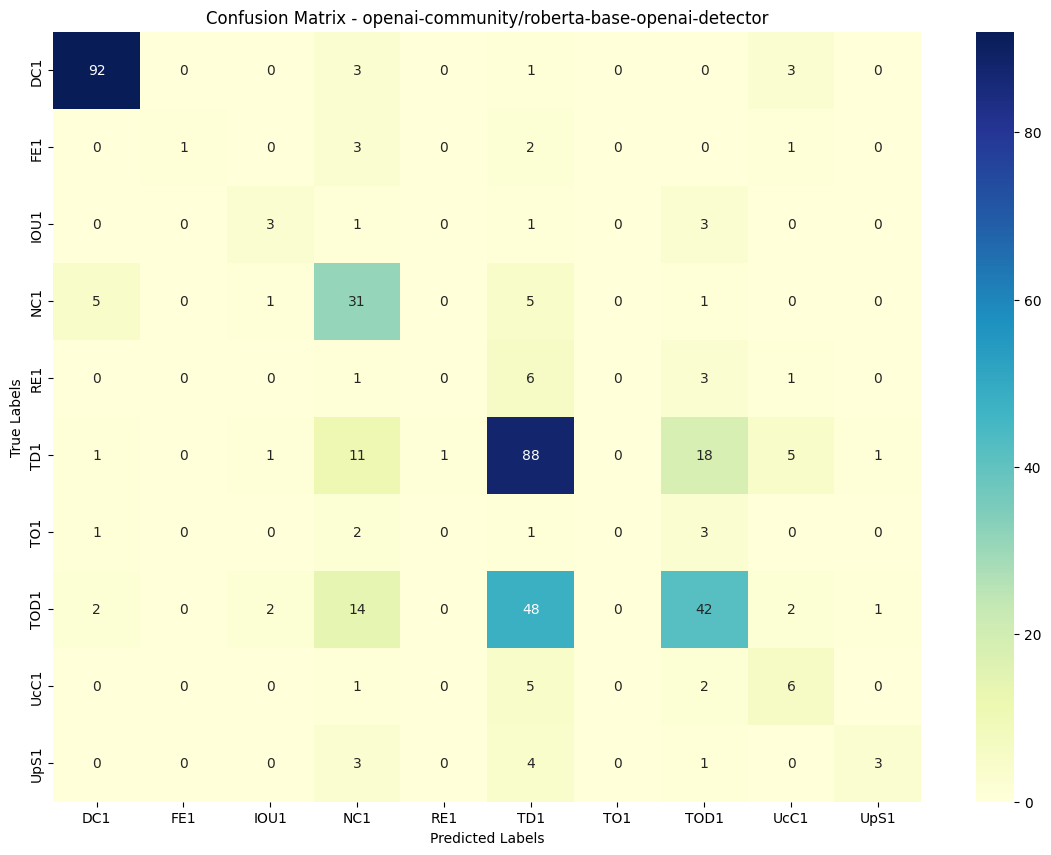

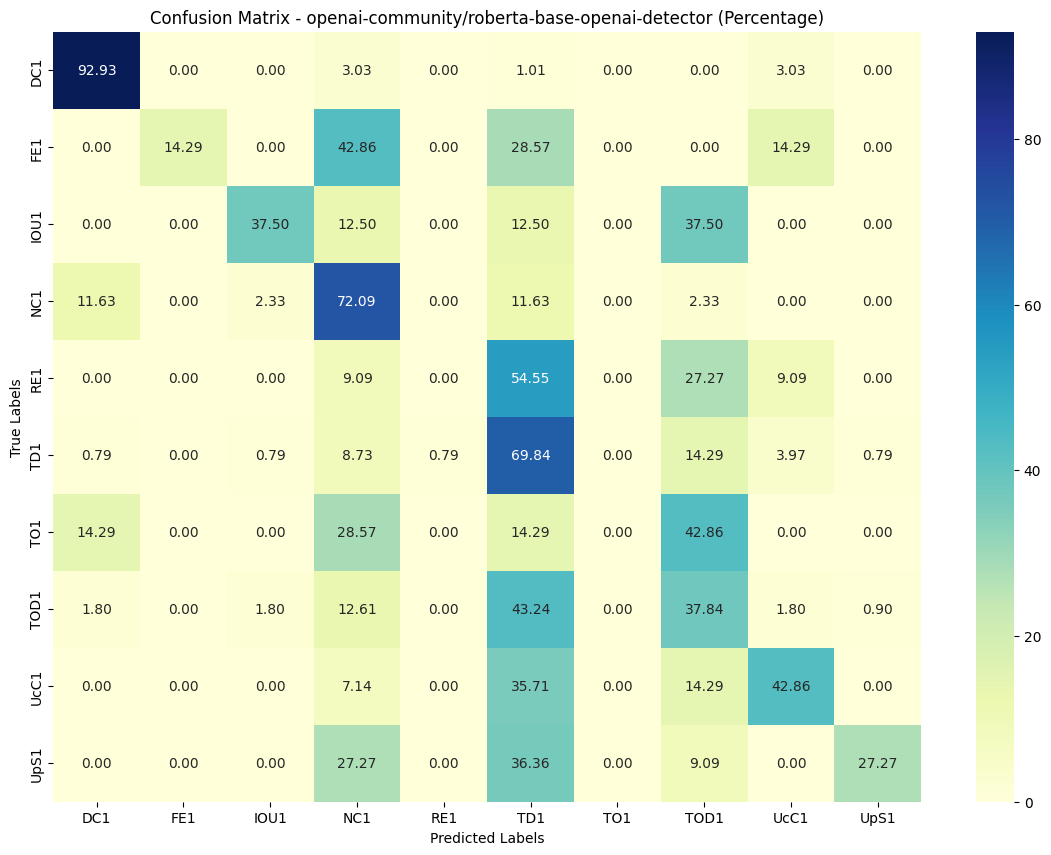

Class DC1 - Precision: 0.9109, Recall: 0.9293, F1 Score: 0.9200, Accuracy: 0.9293
Class FE1 - Precision: 1.0000, Recall: 0.1429, F1 Score: 0.2500, Accuracy: 0.1429
Class IOU1 - Precision: 0.4286, Recall: 0.3750, F1 Score: 0.4000, Accuracy: 0.3750
Class NC1 - Precision: 0.4429, Recall: 0.7209, F1 Score: 0.5487, Accuracy: 0.7209
Class RE1 - Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000, Accuracy: 0.0000
Class TD1 - Precision: 0.5466, Recall: 0.6984, F1 Score: 0.6132, Accuracy: 0.6984
Class TO1 - Precision: 0.0000, Recall: 0.0000, F1 Score: 0.0000, Accuracy: 0.0000
Class TOD1 - Precision: 0.5753, Recall: 0.3784, F1 Score: 0.4565, Accuracy: 0.3784
Class UcC1 - Precision: 0.3333, Recall: 0.4286, F1 Score: 0.3750, Accuracy: 0.4286
Class UpS1 - Precision: 0.6000, Recall: 0.2727, F1 Score: 0.3750, Accuracy: 0.2727


/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/lib/python3.8/dist-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/usr/local/lib/python3.8/dist-packages/sklearn/metrics/_scorer.py", line 444, in _passthrough_scorer
    return estimator.score(*args, **kwargs)
  File "/tmp/ipykernel_696646/3784454423.py", line 20, in score
    y_pred = self.predict(X)
  File "/tmp/ipykernel_696646/3784454423.py", line 16, in predict
    ou

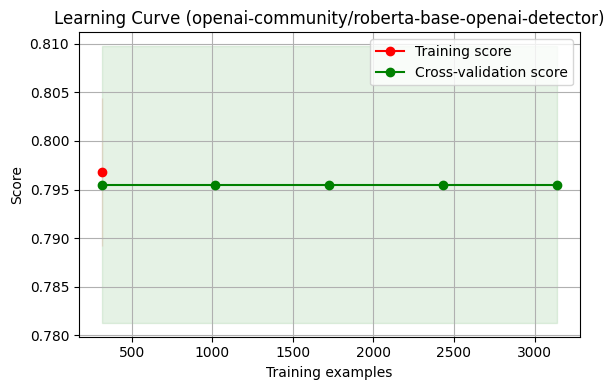

/tmp/ipykernel_696646/3999779995.py:22: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  colors = plt.cm.get_cmap('Set1')(np.linspace(0, 1, n_classes))


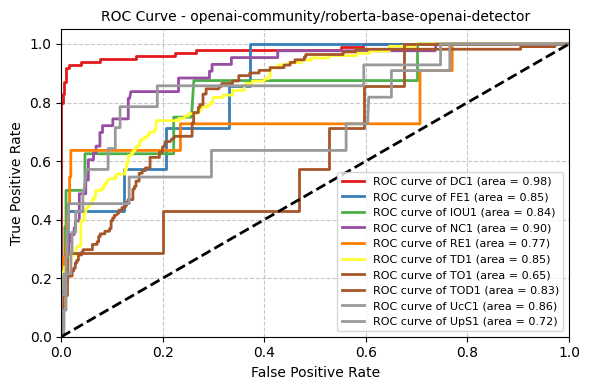

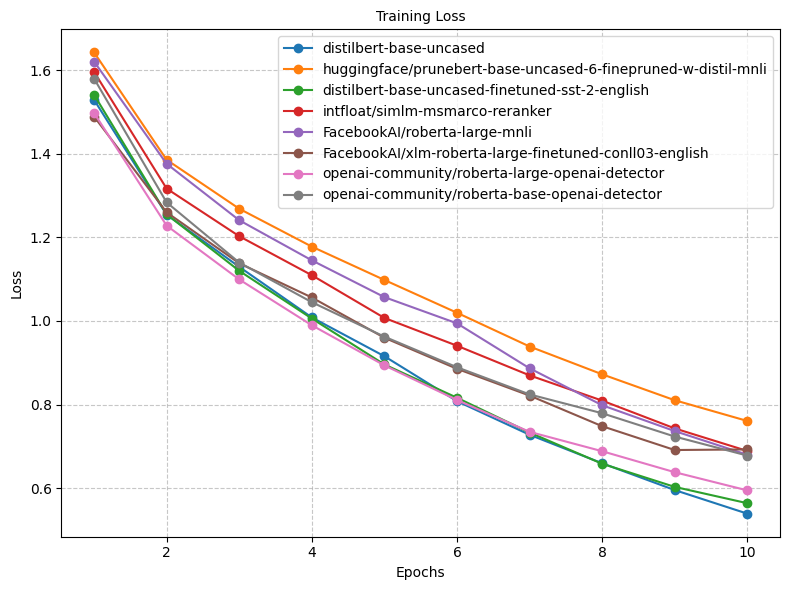

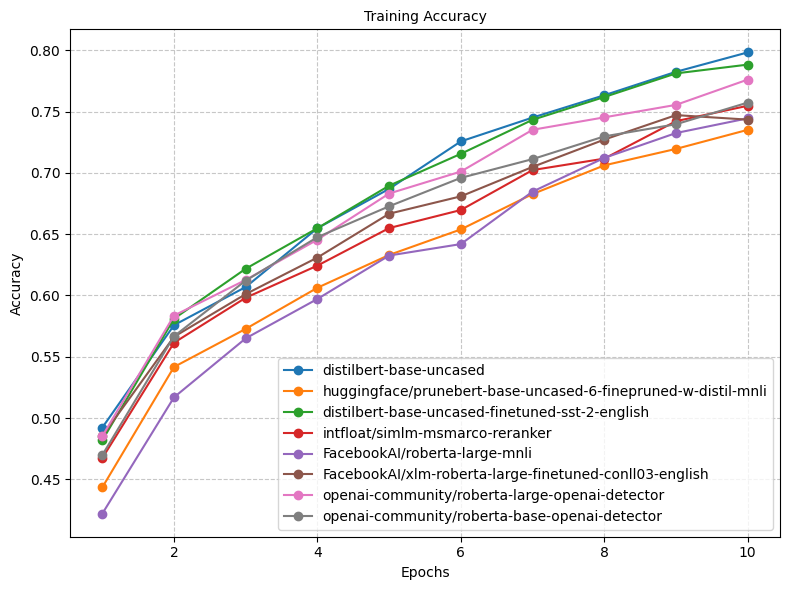

In [3]:
import os
import torch
from transformers import AutoModelForSequenceClassification, AutoTokenizer
from torch.utils.data import DataLoader, TensorDataset
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
import json
from sklearn.preprocessing import LabelEncoder
import numpy as np

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

# Specify the models
models_to_train = [
    "distilbert-base-uncased",
    "huggingface/prunebert-base-uncased-6-finepruned-w-distil-mnli",
    "distilbert-base-uncased-finetuned-sst-2-english",
    "intfloat/simlm-msmarco-reranker",
    "FacebookAI/roberta-large-mnli",
    "FacebookAI/xlm-roberta-large-finetuned-conll03-english",
    "openai-community/roberta-large-openai-detector",
    "openai-community/roberta-base-openai-detector"
]

# Load the JSON data
with open('Benchmark_Solidity_Imbalanced.json', 'r') as json_file:
    data = json.load(json_file)

# Extract input features and output labels
X = [' '.join(str(value) for value in item.values()) if isinstance(item, dict) else str(item) for item in data]
y = [item['y'] for item in data]

# Convert labels to numerical format using LabelEncoder
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)
num_classes = len(label_encoder.classes_)

# Dictionaries to store training losses and accuracies for each model
all_train_losses = {}
all_train_accuracies = {}

for model_name in models_to_train:
    print(f"Training and evaluating model: {model_name}")

    # Load the model and tokenizer
    model = AutoModelForSequenceClassification.from_pretrained(
        model_name,
        num_labels=num_classes,
        problem_type="single_label_classification",
        ignore_mismatched_sizes=True
    )
    tokenizer = AutoTokenizer.from_pretrained(model_name)

    # Move the model to the GPU
    device = 'cuda:0' if torch.cuda.is_available() else 'cpu'
    model = model.to(device)

    # Tokenize the input text
    max_length = 256
    X_encoded = tokenizer(X, padding='max_length', truncation=True, max_length=max_length, return_tensors='pt').to(device)

    # Split the data into train and test sets
    X_train, X_test, y_train, y_test = train_test_split(X_encoded['input_ids'], y_encoded, test_size=0.1, random_state=42)

    # Convert labels to tensors for multi-class classification
    y_train = torch.tensor(y_train, dtype=torch.long).to(device)
    y_test = torch.tensor(y_test, dtype=torch.long).to(device)

    # Create data loaders
    train_dataset = TensorDataset(X_train, y_train)
    train_dataloader = DataLoader(train_dataset, batch_size=8, shuffle=True)
    test_dataset = TensorDataset(X_test, y_test)
    test_dataloader = DataLoader(test_dataset, batch_size=8)

    # Set up optimizer and loss function (CrossEntropyLoss) for multi-class classification
    optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)
    loss_fn = torch.nn.CrossEntropyLoss()

    # Training loop
    model.train()
    epochs = 10

    # Variables for early stopping
    best_loss = float('inf')
    early_stop_counter = 0
    patience = 3  # Number of epochs to wait for improvement

    # Lists to store loss and accuracy values
    train_losses = []
    train_accuracies = []

    for epoch in range(epochs):
        total_loss = 0
        total_accuracy = 0

        for batch in train_dataloader:
            input_ids, labels = batch
            optimizer.zero_grad()
            outputs = model(input_ids)
            logits = outputs.logits
            loss = loss_fn(logits, labels)
            loss.backward()
            optimizer.step()
            total_loss += loss.item()

            # Use argmax to get the predicted class
            y_pred_batch = torch.argmax(logits, dim=1)
            accuracy = accuracy_score(labels.cpu().numpy(), y_pred_batch.cpu().numpy())
            total_accuracy += accuracy

        # Calculate the average loss and accuracy for the epoch
        average_loss = total_loss / len(train_dataloader)
        average_accuracy = total_accuracy / len(train_dataloader)

        print(f"Epoch {epoch + 1}, Average Loss: {average_loss:.4f}, Average Accuracy: {average_accuracy:.4f}")

        # Append loss and accuracy values to the lists
        train_losses.append(average_loss)
        train_accuracies.append(average_accuracy)

        # Check for early stopping
        if average_loss < best_loss:
            best_loss = average_loss
            early_stop_counter = 0
        else:
            early_stop_counter += 1
            if early_stop_counter >= patience:
                print("Early stopping...")
                break

    # Save the trained model
    output_dir = f"./model/{model_name}_trained_model"
    os.makedirs(output_dir, exist_ok=True)
    model.save_pretrained(output_dir)
    tokenizer.save_pretrained(output_dir)

    # Store the training losses and accuracies for this model
    all_train_losses[model_name] = train_losses
    all_train_accuracies[model_name] = train_accuracies

    # Evaluation on testing data
    model.eval()
    y_true = []
    y_pred = []

    with torch.no_grad():
        for batch in test_dataloader:
            input_ids, labels = batch
            outputs = model(input_ids)
            logits = outputs.logits
            y_true.extend(labels.cpu().numpy())
            y_pred = np.append(y_pred, torch.argmax(logits, dim=1).cpu().numpy())

    # Convert predicted labels back to original labels
    y_pred_labels = label_encoder.inverse_transform(y_pred.astype(int))

    # Convert true labels back to original labels
    y_true_labels = label_encoder.inverse_transform(y_true)

    # Calculate precision, recall, and F1 for each class
    accuracy = accuracy_score(y_true_labels, y_pred_labels)
    precision = precision_score(y_true_labels, y_pred_labels, average='weighted')
    recall = recall_score(y_true_labels, y_pred_labels, average='weighted')
    f1 = f1_score(y_true_labels, y_pred_labels, average='weighted')
    print(f"Testing - Accuracy:", accuracy)
    print(f"Testing - Precision:", precision)
    print(f"Testing - Recall", recall)
    print(f"Testing - F1 Score", f1)

    # Calculate the confusion matrix
    cm = confusion_matrix(y_true_labels, y_pred_labels)
    unique_labels = label_encoder.classes_

    # Display confusion matrix
    plt.figure(figsize=(14, 10))
    sns.heatmap(cm, annot=True, fmt="d", cmap="YlGnBu", xticklabels=unique_labels, yticklabels=unique_labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.show()

    # Display confusion matrix with percentage values
    cm_percentage = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis] * 100.0
    plt.figure(figsize=(14, 10))
    sns.heatmap(cm_percentage, annot=True, fmt=".2f", cmap="YlGnBu", xticklabels=unique_labels, yticklabels=unique_labels)
    plt.xlabel("Predicted Labels")
    plt.ylabel("True Labels")
    plt.title(f"Confusion Matrix - {model_name} (Percentage)")
    plt.show()
    
    

    # Calculate and print precision, recall, and F1 for each class
    for i, class_label in enumerate(unique_labels):
        precision = precision_score(y_true_labels, y_pred_labels, labels=[class_label], average='weighted')
        recall = recall_score(y_true_labels, y_pred_labels, labels=[class_label], average='weighted')
        f1 = f1_score(y_true_labels, y_pred_labels, labels=[class_label], average='weighted')

        # Calculate accuracy for each class
        if i < cm.shape[0]:  # Ensure index is within bounds
            true_positive = cm[i, i]
            total_instances = cm[i].sum()
            class_accuracy = true_positive / total_instances if total_instances > 0 else 0
        else:
            class_accuracy = 0

        print(f"Class {class_label} - Precision: {precision:.4f}, Recall: {recall:.4f}, F1 Score: {f1:.4f}, Accuracy: {class_accuracy:.4f}")


    # Learning curve 
    model_wrapper = PyTorchClassifierWrapper(model, device)

    # Plot learning curve
    plot_learning_curve(
        model_wrapper, 
        f"Learning Curve ({model_name})", 
        X_train.cpu().numpy(), 
        y_train.cpu().numpy(), 
        cv=5
    )
    plt.tight_layout()
    plt.show()
    

    # ROC Curve        
    # First, ensure the model is in evaluation mode
    model.eval()

    # Move X_test to the appropriate device and convert to the right format
    X_test_tensor = X_test.to(device)

    # Get predictions
    with torch.no_grad():
        y_pred_proba = model(X_test_tensor).logits

    # Move the predictions to CPU and convert to numpy
    y_pred_proba = y_pred_proba.cpu().numpy()

    # Now plot the ROC curve
    plot_roc_curve(y_test.cpu().numpy(), y_pred_proba, label_encoder, model_name)    
    
    
    print()

    
# Training Loss Plot
plt.figure(figsize=(8, 6))
for model_name, losses in all_train_losses.items():
    plt.plot(range(1, len(losses) + 1), losses, label=model_name, marker='o')
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Loss', fontsize=10)
plt.title('Training Loss', fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

# Training Accuracy Plot
plt.figure(figsize=(8, 6))
for model_name, accuracies in all_train_accuracies.items():
    plt.plot(range(1, len(accuracies) + 1), accuracies, label=model_name, marker='o')
plt.xlabel('Epochs', fontsize=10)
plt.ylabel('Accuracy', fontsize=10)
plt.title('Training Accuracy', fontsize=10)
plt.legend(fontsize=10)
plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
